<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Demos_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demos logistic regression

## Student admission

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, datasets

In [2]:
datasetAdmission = pd.read_csv('StudentAdmission.csv')
datasetAdmission.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**Scatterplot**

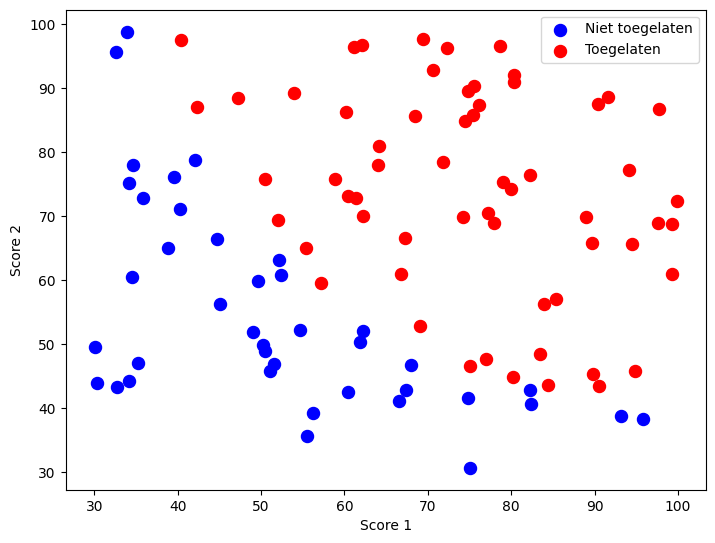

In [3]:
x1 = datasetAdmission[['Score1']].values
x2 = datasetAdmission[['Score2']].values
y = datasetAdmission[['Admission']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Niet toegelaten', 'Toegelaten']
fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Toegelaten')
ax_admission.set_xlabel('Score 1')
ax_admission.set_ylabel('Score 2')
ax_admission.legend(loc=1,numpoints=1)

x1, x2, y: Splitst de data in individuele arrays voor Score1, Score2 en Admission.

zero_class en one_class: Booleaanse maskers voor respectievelijk niet-toegelaten (0) en toegelaten (1) studenten.

plt.figure(): Maakt een nieuwe lege figuur voor de plot.

ax_admission.scatter(...): Maakt een scatterplot voor beide klassen met verschillende kleuren (b voor niet-toegelaten, r voor toegelaten).

set_xlabel() en set_ylabel(): Stellen de aslabels in.

legend(): Voegt een legenda toe voor de twee klassen.



In [4]:
features = list(datasetAdmission.columns[:2])
print(features)
X = datasetAdmission[features].values

y= datasetAdmission['Admission'].values

logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

['Score1', 'Score2']


LogisticRegression(C=100000.0, solver='liblinear')

LogisticRegression(C=1e5, solver='liblinear'):

C=1e5: Weinig regularisatie (sterkere fit).

solver='liblinear': Geschikt voor kleinere datasets.

fit(X, y): Past het model aan op de volledige dataset.



features: Bevat de namen van de kolommen die als features worden gebruikt (Score1 en Score2).

X: Matrix met alle features (Score1 en Score2).

y: Doelvariabele (Admission), bevat de labels (0 of 1).



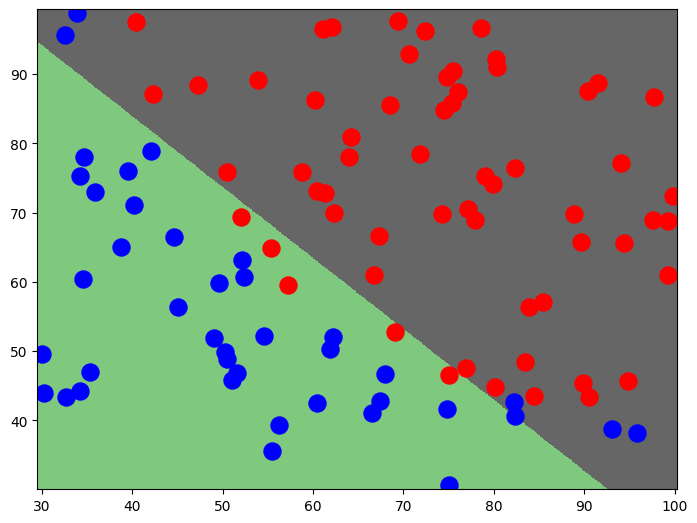

In [5]:
# decision boundary
h = 0.1
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')

meshgrid: Maakt een fijn raster van coördinaten (xx, yy) voor het tekenen van de beslissingsgrens.

np.c_: Combineert xx en yy in een (n, 2) matrix voor voorspellingen.

Z.reshape(xx.shape): Zet de voorspelde labels (Z) terug naar de vorm van het raster voor de plot.

pcolormesh: Kleurt de achtergrond in op basis van de voorspelde klassen.

scatter: Plaatst de originele datapunten erbovenop.



In [6]:
# Prediction with score1 = 45 and score2 = 85

print(logreg.predict(np.array([[45,85]])))

[1]


predict: Voorspelt of een student met Score1=45 en Score2=85 wordt toegelaten (1) of niet (0).

**Gebruiken van hogere orde features**

(347, 354)


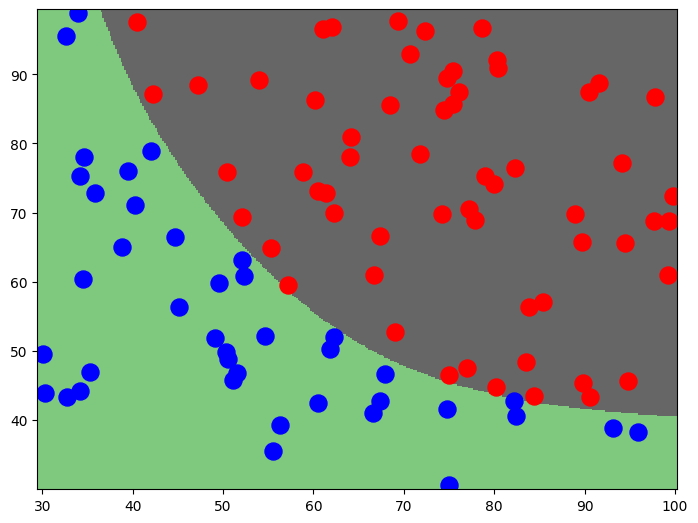

In [7]:
# Higher order features
graad = 4

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model

logreg_poly = linear_model.LogisticRegression(C=1,solver='liblinear')
logreg_poly.fit(Xp, y)


# decision boundary
h = 0.2
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')




graad = 4: Kies een polynomiale graad van 4.

PolynomialFeatures: Transformeert de features naar een hogere-orde representatie (voegt termen zoals x1^2, x2^2, x1*x2, etc. toe).

fit_transform(X): Past deze transformatie toe op de originele features (X). C=1: Iets sterkere regularisatie om overfitting te voorkomen.

fit(Xp, y): Past het model aan met de hogere-orde features.

poly.fit_transform: Transformeert de meshgrid-data (XXp) naar hogere-orde features.

pcolormesh: Kleurt de achtergrond in op basis van de voorspelde klassen.

scatter: Plaatst de originele datapunten erbovenop.



## Quality control

In [8]:
dataset_QC = pd.read_csv('Quality_Control.csv')
dataset_QC.head()

,Test1,Test2,Quality_OK
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualiseer de data met behulp van een scatterplot. Duid de twee verschillende klasses (geaccepteerd of verworpen) aan met een verschillend symbool of kleur.

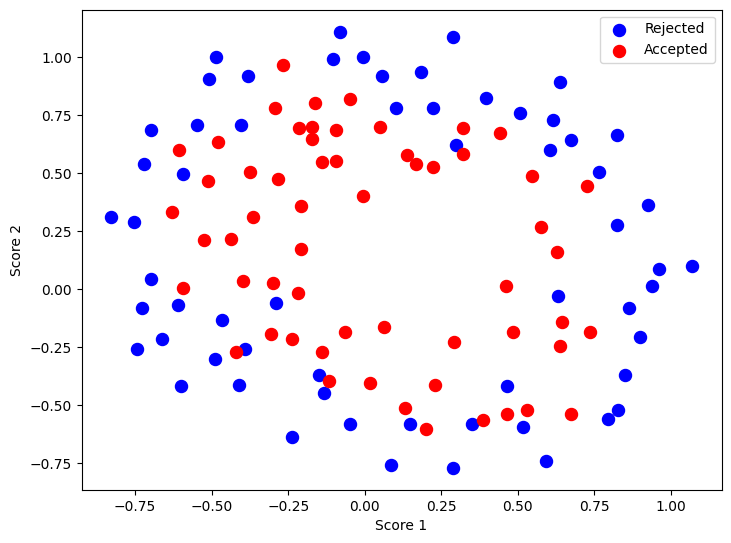

In [9]:
# Scatterplot

x1 = dataset_QC[['Test1']].values
x2 = dataset_QC[['Test2']].values
y = dataset_QC[['Quality_OK']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Rejected', 'Accepted']
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Accepted')
ax_QC.set_xlabel('Score 1')
ax_QC.set_ylabel('Score 2')
ax_QC.legend(loc=1,numpoints=1)



 Deze code maakt een **scatterplot** voor de **Quality Control** (`QC`) dataset om de twee klassen (`Rejected` en `Accepted`) visueel te onderscheiden. Laten we dit stap voor stap uitleggen:

---

### **1. Uitsplitsen van de features en target**

```python
x1 = dataset_QC[['Test1']].values
x2 = dataset_QC[['Test2']].values
y = dataset_QC[['Quality_OK']].values
```

* **x1**: Extract de waarden van de kolom `Test1` als een numpy-array.
* **x2**: Extract de waarden van de kolom `Test2` als een numpy-array.
* **y**: Extract de doelvariabele `Quality_OK` als een numpy-array.

Voorbeeld van hoe de data eruit zou kunnen zien:

| Test1 | Test2 | Quality\_OK |
| ----- | ----- | ----------- |
| 85    | 90    | 1           |
| 45    | 60    | 0           |
| 78    | 88    | 1           |
| 35    | 50    | 0           |

Na deze stap heb je drie numpy-arrays:

* **x1**: `[[85], [45], [78], [35], ...]`
* **x2**: `[[90], [60], [88], [50], ...]`
* **y**: `[[1], [0], [1], [0], ...]`

---

### **2. Scheiden van de klassen (`Rejected` en `Accepted`)**

```python
zero_class = (y == 0)
one_class = (y == 1)
```

* **zero\_class**: Maakt een Booleaanse array die `True` is voor alle `0`-waarden (`Rejected`) en `False` voor alle `1`-waarden.
* **one\_class**: Maakt een Booleaanse array die `True` is voor alle `1`-waarden (`Accepted`) en `False` voor alle `0`-waarden.

Voorbeeld:

Als **y** de waarden `[[1], [0], [1], [0], [1]]` heeft, dan:

* **zero\_class**: `[False, True, False, True, False]`
* **one\_class**: `[True, False, True, False, True]`

---

### **3. Instellen van de labels voor de legenda**

```python
labels = ['Rejected', 'Accepted']
```

* Maakt een lijst met de labels voor de twee klassen.
* Wordt later gebruikt in de legenda.

---

### **4. Creëren van een lege figuur voor de scatterplot**

```python
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
```

* **plt.figure()**: Maakt een nieuwe, lege figuur.
* **add\_axes(\[0,0,1,1])**: Voegt een assenstelsel (`axes`) toe dat de volledige figuur beslaat (van linksboven naar rechtsonder).

---

### **5. Plotten van de `Rejected` en `Accepted` klassen**

```python
ax_QC.scatter(x1[zero_class], x2[zero_class], c='b', s=75, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r', s=75, label='Accepted')
```

* **scatter(x1\[zero\_class], x2\[zero\_class], c='b', s=75, label='Rejected')**:

  * Plot alle punten die behoren tot de `Rejected` klasse (`0`).
  * **c='b'**: Kleur de punten blauw.
  * **s=75**: Stel de grootte van de punten in op 75.
  * **label='Rejected'**: Zorg ervoor dat deze klasse correct in de legenda wordt weergegeven.

* **scatter(x1\[one\_class], x2\[one\_class], c='r', s=75, label='Accepted')**:

  * Plot alle punten die behoren tot de `Accepted` klasse (`1`).
  * **c='r'**: Kleur de punten rood.
  * **s=75**: Stel de grootte van de punten in op 75.
  * **label='Accepted'**: Zorg ervoor dat deze klasse correct in de legenda wordt weergegeven.

---

### **6. Instellen van de aslabels en legenda**

```python
ax_QC.set_xlabel('Score 1')
ax_QC.set_ylabel('Score 2')
ax_QC.legend(loc=1, numpoints=1)
```

* **set\_xlabel('Score 1')**: Zet de label van de x-as naar `Score 1`.
* **set\_ylabel('Score 2')**: Zet de label van de y-as naar `Score 2`.
* **legend(loc=1, numpoints=1)**:

  * **loc=1**: Plaatst de legenda in de rechterbovenhoek (positie `1`).
  * **numpoints=1**: Geeft aan dat elke klas slechts één symbool gebruikt in de legenda.

---

### **7. Resultaat**

De scatterplot zal nu:

* Blauwe punten tonen voor de `Rejected` (`Quality_OK=0`) samples.
* Rode punten tonen voor de `Accepted` (`Quality_OK=1`) samples.
* Een duidelijke legenda hebben met de labels `Rejected` en `Accepted`.
* Correct geëtiketteerde assen (`Score 1` en `Score 2`).

---



In [10]:
X = np.concatenate((x1,x2),1)
y=y.ravel()
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

LogisticRegression(C=100000.0, solver='liblinear')

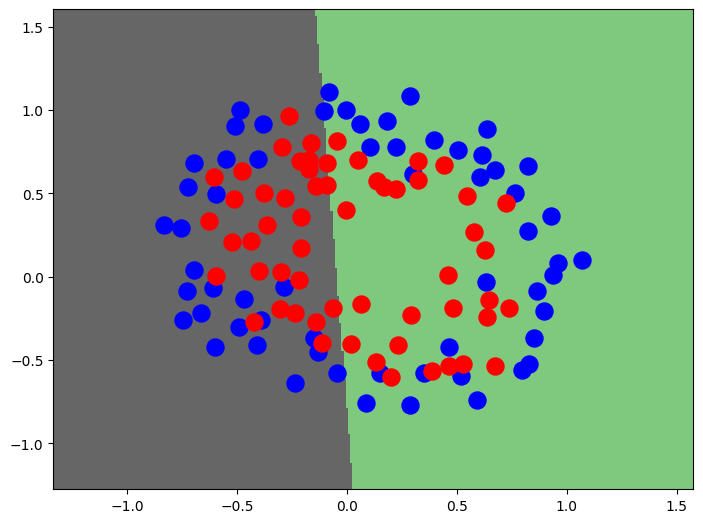

In [11]:
# decision boundary
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_QC.pcolormesh(xx, yy, Z,cmap='Accent')

ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Accpeted')

**Higher order features**


### **Uitleg voor Beginners - Decision Boundary Plotten met Matplotlib**

---

Dit stukje code **visualiseert** de **beslissingsgrens** van een **Logistic Regression** model. Het laat zien welke gebieden in je data **geaccepteerd** (positief) of **afgewezen** (negatief) worden door je model. Laten we dit stap voor stap uitleggen.

---

#### **1. Bepalen van de Grenzen van je Data**

```python
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
```

* **Wat dit doet:** Bepaalt de **minimale** en **maximale** waarden voor **x1** en **x2**.
* **Waarom:** Je wil de beslissingsgrens iets **breder** maken dan je data voor een **nettere** plot.

---

#### **2. Maken van een Grid (Rooster)**

```python
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
```

* **Wat dit doet:** Maakt een **grid** van alle mogelijke **x1** en **x2** waarden in je data.
* **Waarom:** Dit grid gebruik je om je beslissingsgrens te tekenen.

---

#### **3. Voorspellen van Klassen voor Elk Punt in de Grid**

```python
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
```

* **Wat dit doet:**

  * **np.c\_** maakt van je **xx** en **yy** arrays een lange lijst van **(x1, x2)** punten.
  * **logreg.predict()** gebruikt je getrainde **Logistic Regression** model om te voorspellen welke klasse elk punt in het grid heeft (**0** of **1**).
* **Waarom:** Dit laat je zien **waar** je model **klasse 0** van **klasse 1** scheidt.

---

#### **4. Voorbereiden van de Plot**

```python
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
```

* **Wat dit doet:** Maakt een nieuw leeg figuur (canvas) om je data op te plotten.
* **Waarom:** Hiermee heb je meer controle over de **positie** en **grootte** van je plot.

---

#### **5. Het Grid Terug in Vorm Brengen**

```python
Z = Z.reshape(xx.shape)
```

* **Wat dit doet:** Zet je voorspellingen terug in de **originele** vorm van het grid.
* **Waarom:** Je hebt een 2D-array nodig om de beslissingsgrens te tekenen.

---

#### **6. Beslissingsgrens Tekenen (Decision Boundary)**

```python
ax_QC.pcolormesh(xx, yy, Z, cmap='Accent')
```

* **Wat dit doet:** Kleur elk punt in je grid in afhankelijk van de voorspelde klasse (**0** of **1**).
* **Waarom:** Zo krijg je een visuele **scheiding** tussen de klassen.

---

#### **7. Plotten van de Oorspronkelijke Data**

```python
ax_QC.scatter(x1[zero_class], x2[zero_class], c='b', s=150, label='Rejected')
ax_QC.scatter(x1[one_class], x2[one_class], c='r', s=150, label='Accepted')
```

* **Wat dit doet:**

  * Plot je **afgewezen** (blauw) en **geaccepteerde** (rood) voorbeelden op de grid.
* **Waarom:** Laat zien **waar** je originele data ligt ten opzichte van je beslissingsgrens.

---

#### **8. Wat je Hieruit Krijgt:**

* **Gekleurde Achtergrond:** Laat zien welke gebieden **positief** en **negatief** zijn.
* **Punten:** Laat je originele data zien, zodat je kunt zien hoe goed je model presteert.

---

#### **9. Resultaat:**

Je krijgt een mooie grafiek met:

* **Kleuren** die je beslissingsgrens aangeven.
* **Punten** die je originele data representeren.

---

Zou je willen dat ik je laat zien hoe je deze beslissingsgrens **complexer** kunt maken met **polynomial features**? Of misschien hoe je de **betrouwbaarheid** van deze grens kunt meten? Laat het me weten! 😊


(288, 291)


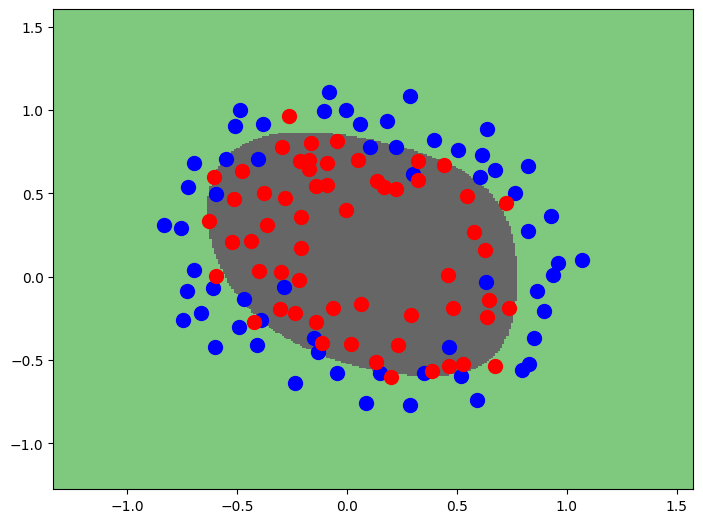

In [12]:
degree = 10

poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(X)



logreg_poly = linear_model.LogisticRegression(C=5,solver='liblinear')
logreg_poly.fit(Xp, y)


h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=100, label='Rejected')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=100, label='Accepted')


### **Uitleg voor Beginners - Complexe Beslissingsgrens met Hogere-orde Features (Graad 10)**

---

Dit stukje code doet **twee** belangrijke dingen:

1. **Maakt** **hogere-orde** features om **complexere** beslissingsgrenzen te leren.
2. **Plot** deze beslissingsgrens samen met je originele data.

---

#### **1. Maken van Hogere-orde Features**

```python
degree = 10

poly = PolynomialFeatures(degree)
Xp = poly.fit_transform(X)
```

* **Wat dit doet:**

  * Maakt **extra** features tot de **10e macht**.
* **Waarom:** Hierdoor kan je model **complexere** beslissingsgrenzen leren.
* **Voorbeeld:**

  * **$x^2, y^2, xy, x^3, y^3, x^4y^2$**
* **Hoeveel features krijg je?** Bij **graad 10** worden **twee** originele kenmerken uitgebreid naar **66** features!

---

#### **2. Trainen van het Model**

```python
logreg_poly = linear_model.LogisticRegression(C=5,solver='liblinear')
logreg_poly.fit(Xp, y)
```

* **Wat dit doet:**

  * Train een **Logistic Regression** model met de **uitgebreide** kenmerken.
* **C=5:** Dit regelt hoe **sterk** je model wordt gestraft voor **grote** gewichten (regularisatie).
* **solver='liblinear':** Dit is een **snelle** optimizer voor kleine datasets.

---

#### **3. Maken van een Grid (Rooster)**

```python
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
```

* **Wat dit doet:** Maakt een **grid** van alle mogelijke **x1** en **x2** waarden in je data.
* **Waarom:** Dit grid gebruik je om je beslissingsgrens te tekenen.

---

#### **4. Voorbereiden van de Grid Features**

```python
XXp = np.c_[xx.ravel(), yy.ravel()]
xx_p = poly.fit_transform(XXp)
```

* **Wat dit doet:**

  * Zet je **x1** en **x2** waarden in de juiste **vorm** voor je model.
* **Waarom:** Je moet dezelfde **polynomial features** gebruiken als je tijdens **training** hebt gemaakt.

---

#### **5. Voorspellen van Klassen voor Elk Punt in de Grid**

```python
Z = logreg_poly.predict(xx_p)
```

* **Wat dit doet:** Voorspel de klasse (**0** of **1**) voor **elk** punt in de grid.
* **Waarom:** Dit geeft je de **vorm** van je beslissingsgrens.

---

#### **6. Voorbereiden van de Plot**

```python
fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
```

* **Wat dit doet:** Maakt een nieuw leeg figuur (canvas) om je data op te plotten.
* **Waarom:** Hiermee heb je meer controle over de **positie** en **grootte** van je plot.

---

#### **7. Het Grid Terug in Vorm Brengen**

```python
print(xx.shape)
Z = Z.reshape(xx.shape)
```

* **Wat dit doet:** Zet je voorspellingen terug in de **originele** vorm van het grid.
* **Waarom:** Je hebt een 2D-array nodig om de beslissingsgrens te tekenen.

---

#### **8. Beslissingsgrens Tekenen (Decision Boundary)**

```python
ax_admission.pcolormesh(xx, yy, Z, cmap='Accent')
```

* **Wat dit doet:** Kleur elk punt in je grid in afhankelijk van de voorspelde klasse (**0** of **1**).
* **Waarom:** Zo krijg je een visuele **scheiding** tussen de klassen.

---

#### **9. Plotten van de Oorspronkelijke Data**

```python
ax_admission.scatter(x1[zero_class], x2[zero_class], c='b', s=100, label='Rejected')
ax_admission.scatter(x1[one_class], x2[one_class], c='r', s=100, label='Accepted')
```

* **Wat dit doet:**

  * Plot je **afgewezen** (blauw) en **geaccepteerde** (rood) voorbeelden op de grid.
* **Waarom:** Laat zien **waar** je originele data ligt ten opzichte van je beslissingsgrens.

---

#### **10. Wat je Hieruit Krijgt:**

* **Gekleurde Achtergrond:** Laat zien welke gebieden **positief** en **negatief** zijn.
* **Punten:** Laat je originele data zien, zodat je kunt zien hoe goed je model presteert.

---

#### **11. Resultaat:**

Je krijgt een mooie grafiek met:

* **Kleuren** die je beslissingsgrens aangeven.
* **Punten** die je originele data representeren.

---

Zou je willen dat ik je help om deze beslissingsgrens **nog complexer** te maken? Of misschien hoe je **overfitting** kunt voorkomen bij zulke hoge graden? Laat het me weten! 😊
